## Time Series analysis

A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals.  The data is considered in three types:

Time series data: A set of observations on the values that a variable takes at different times.

Cross-sectional data: Data of one or more variables, collected at the same point in time.

Pooled data: A combination of time series data and cross-sectional data.

Terms and concepts:

Dependence: Dependence refers to the association of two observations with the same variable, at prior time points.

Stationarity: Shows the mean value of the series that remains constant over a time period; if past effects accumulate and the values increase toward infinity, then stationarity is not met.

Differencing: Used to make the series stationary, to De-trend, and to control the auto-correlations; however, some time series analyses do not require differencing and over-differenced series can produce inaccurate estimates.

Specification: May involve the testing of the linear or non-linear relationships of dependent variables by using models such as ARIMA, ARCH, GARCH, VAR, Co-integration, etc.

Exponential smoothing in time series analysis: This method predicts the one next period value based on the past and current value.  It involves averaging of data such that the nonsystematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term predication.  Alpha, Gamma, Phi, and Delta are the parameters that estimate the effect of the time series data.  Alpha is used when seasonality is not present in data.  Gamma is used when a series has a trend in data.  Delta is used when seasonality cycles are present in data.  A model is applied according to the pattern of the data.  Curve fitting in time series analysis: Curve fitting regression is used when data is in a non-linear relationship. The following equation shows the non-linear behavior:

Dependent variable, where case is the sequential case number.

Curve fitting can be performed by selecting “regression” from the analysis menu and then selecting “curve estimation” from the regression option. Then select “wanted curve linear,” “power,” “quadratic,” “cubic,” “inverse,” “logistic,” “exponential,” or “other.”


## Health Information Brazil
**Epidemiologicas and morbidity**
 Focus in a dataset about **Tuberculosis cases** extract from the TABNET 
 
 The data is related to the year/ month of the illness was diagnosticated in Brazil.


Font: http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/tubercbr.def

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read the file and show the information

In [2]:
url = "https://github.com/AndreisSirlene/Bootcamp_datascience/raw/main/Module%204/%20tuberculosis_year_month_diagnosy.csv"

tube = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=17, engine="python")
tube.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
tube.drop('Total', axis=1, inplace=True)
tube.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


### Challenge 1:
Transforme the data in a time series year-month using melt function from pandas, after rename the colunms.


In [4]:
tube_ts = tube.melt(id_vars = 'Ano Diagnóstico', value_name= 'Cases', var_name='Month')
tube_ts['Date'] = tube_ts['Ano Diagnóstico'].apply(str) + "-" + tube_ts['Month']

tube_ts

,Ano Diagnóstico,Month,Cases,Date
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


### Challenge 2:
Convert the column Date (string) to Datetime

In [5]:
dict =  {"Jan":"1","Fev":"2","Mar":"3","Abr":"4","Mai":"5","Jun":"6",
         "Jul":"7","Ago":"8","Set":"9",
         "Out":"10","Nov":"11","Dez":"12"}

new_date = []
for i  in tube_ts["Date"]:
  value = i.replace("-", " ")
  x = value.split()[1].replace(value.split()[1],dict[value.split()[1]])
  new_date.append(str(value.split()[0] +"-" +  x))

In [6]:
tube_ts['Date'] = new_date
tube_ts.head(5)

,Ano Diagnóstico,Month,Cases,Date
0,2001,Jan,8088,2001-1
1,2002,Jan,8013,2002-1
2,2003,Jan,8115,2003-1
3,2004,Jan,7574,2004-1
4,2005,Jan,7432,2005-1


In [7]:
tube_ts['Date'] = pd.to_datetime(tube_ts['Date'])
tube_ts['Date'].dt.strftime('%Y-%m')
tube_ts

,Ano Diagnóstico,Month,Cases,Date
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dez,6844,2015-12-01
224,2016,Dez,6672,2016-12-01
225,2017,Dez,7020,2017-12-01
226,2018,Dez,6900,2018-12-01


Reorganize the dataframe and keep only the columns that are relevant for the analysis of Time series

In [8]:
tube_ts = tube_ts[['Date', 'Cases']]
tube_ts

,Date,Cases
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


In [9]:
tube_ts.sort_values(['Date'], inplace=True)
tube_ts.reset_index(drop=True, inplace=True)
tube_ts

,Date,Cases
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656
...,...,...
223,2019-08-01,8239
224,2019-09-01,8143
225,2019-10-01,8592
226,2019-11-01,7615


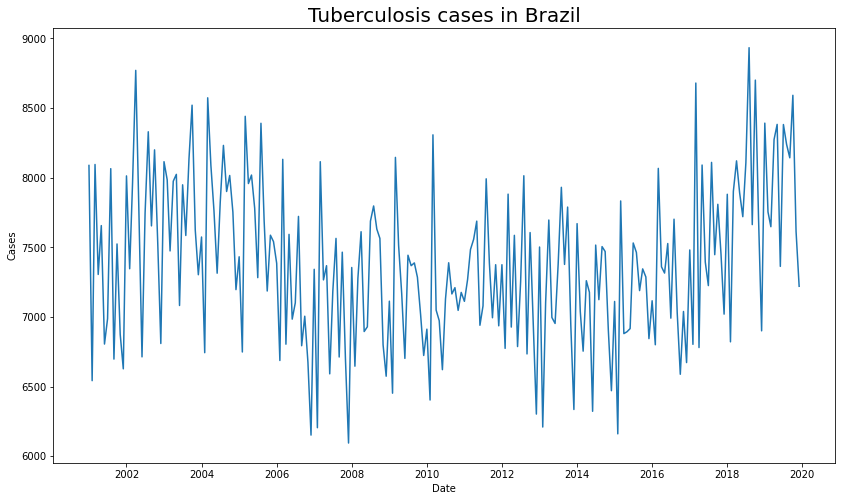

In [10]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(x= 'Date', y='Cases', data=tube_ts)
plt.title('Tuberculosis cases in Brazil', fontsize=20);

### Trendings and moving averages of time series

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.

In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

In [11]:
tube_ts['Cases'].rolling(3).mean()

0              NaN
1              NaN
2      7575.000000
3      7314.000000
4      7685.333333
          ...     
223    7994.666667
224    8254.666667
225    8324.666667
226    8116.666667
227    7809.000000
Name: Cases, Length: 228, dtype: float64

**Using the moving average window interval of 3 months in the plot bellow**

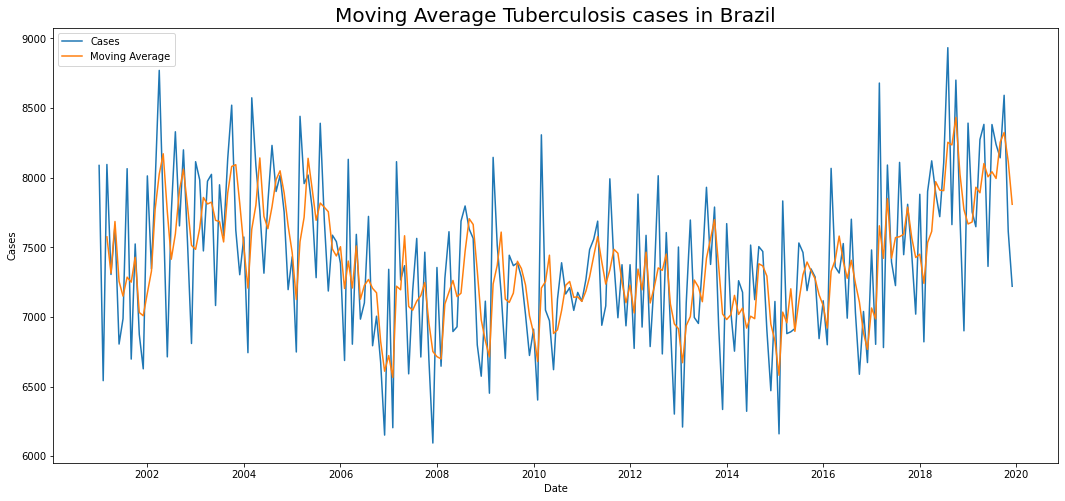

In [38]:
tube_ts['Moving_Average_3'] = tube_ts['Cases'].rolling(3).mean()
plt.figure(figsize=(18,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_ts)
sns.lineplot(x= 'Date', y='Moving_Average_3', data=tube_ts)
plt.title('Moving Average Tuberculosis cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average"]);

#### One alternative is to plot only the 50 first elements of the time series to understand the visualization.

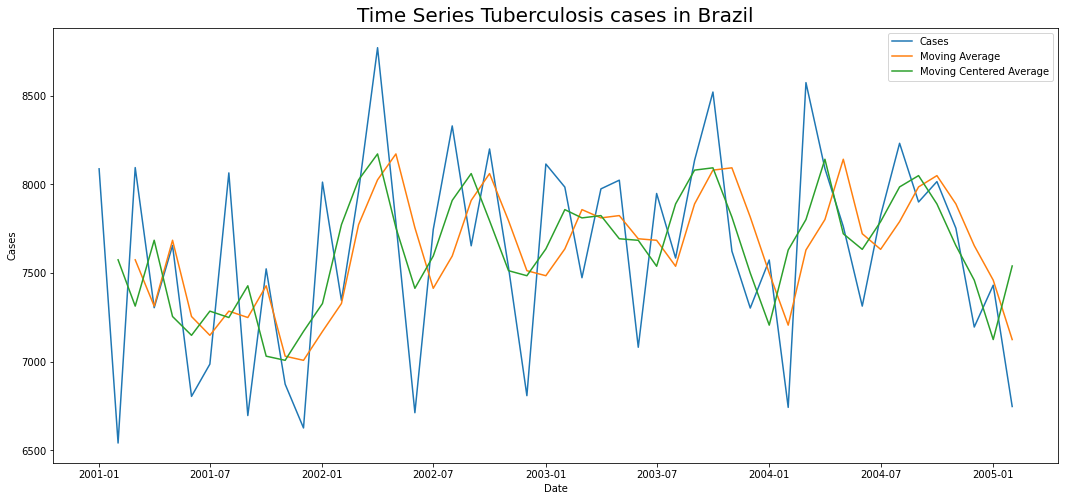

In [35]:
#Using a variable igual 3 centred
tube_ts['Moving_Average_3c'] = tube_ts['Cases'].rolling(3, center=True).mean()

tube_ts['Moving_Average_3'] = tube_ts['Cases'].rolling(3).mean()
plt.figure(figsize=(18,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_ts[:50])
sns.lineplot(x= 'Date', y='Moving_Average_3', data=tube_ts[:50])
sns.lineplot(x= 'Date', y='Moving_Average_3c', data=tube_ts[:50])
plt.title('Time Series Tuberculosis cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average","Moving Centered Average"]);

**Using the moving average window interval of 6 months in the plot bellow.**

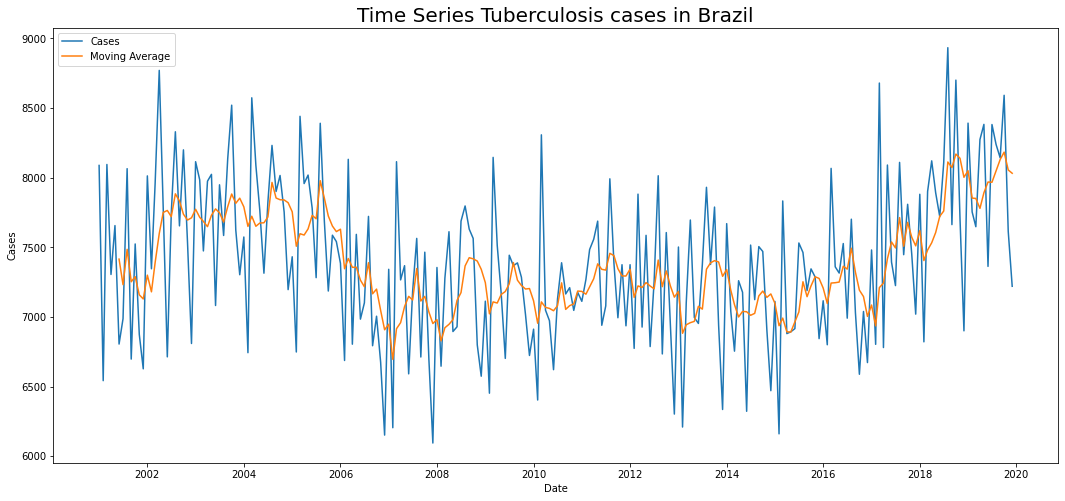

In [36]:
tube_ts['Moving_Average_6'] = tube_ts['Cases'].rolling(6).mean()
plt.figure(figsize=(18,8))
sns.lineplot(x= 'Date', y='Cases', data=tube_ts)
sns.lineplot(x= 'Date', y='Moving_Average_6', data=tube_ts)
plt.title('Time Series Tuberculosis cases in Brazil', fontsize=20)
plt.legend(["Cases","Moving Average"]);

### Challenge 5:
Analyse other windows for the moving average, and thinking about the impacts when big windows are used. 

### Challenge 6:
Realize the first forecast using mean for all time series from the last 3 months

### Challenge 3:
Search for other dataset and work to transform in a time series.

I choose the dataset from Datasus related to LEPROSY cases contact diagnostics in Brazil.

## Leprosy

#### Introduction
Leprosy is a chronic condition with high potential for causing disability and stigma perpetuating the vicious circle of poverty. A significant decrease of incidence rates after introduction of the multidrug therapy can be observed, but the disease is still a cause of morbidity, especially in vulnerable populations. In addition, the impact on mortality patterns from direct or indirect causes related to the disease is present, especially in the male population.

Leprosy cases are not distributed homogeneously in Brazil, with areas of higher risk mainly located in the Midwest, North, and Northeast regions. The ten clusters with the highest risk of occurrence of new cases (NC) are located mainly in the states of Mato Grosso, Pará, Maranhão, Tocantins, Goiás, Rondônia, and Bahia; together, they account for 44% of all cases diagnosed in 2013. In 2014, the state of Bahia ranked thirteenth in the national ranking of new case detection rates with 17.4 new leprosy cases per 100,000 inhabitants, higher than the Brazilian average (15.3 cases per 100,000 inhabitants).

In [14]:
url = 'https://github.com/AndreisSirlene/Bootcamp_datascience/raw/main/Module%204/A111504189_28_143_208.csv'
leprosy = pd.read_csv(url,encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=10, engine="python" )
leprosy.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,<1975,42,14,45,29,23,46,32,26,20,39,50,60,426
1,1975,-,2,-,-,-,-,-,-,-,-,-,-,2
2,1976,-,-,-,6,1,10,-,-,3,-,8,-,28
3,1977,2,-,-,4,-,-,-,-,-,-,-,-,6
4,1978,-,-,-,-,-,-,3,7,-,-,-,-,10


Decided to drop the first 25 rows as most of the years does not have data fill in, and at the same time keep the same format as the Tuberculosis time series.

In [15]:
leprosy.drop('Total', axis=1, inplace=True)
leprosy.drop(leprosy.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,46]], inplace=True)
leprosy.head(3)

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
26,2000,454,447,346,230,250,327,268,389,414,700,697,969
27,2001,7028,7205,8240,7093,7962,6740,7230,8098,6869,8520,7646,6562
28,2002,8226,8822,9728,11718,10682,10989,12276,12764,11840,12994,12066,9755


In [16]:
leprosy.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
41,2015,8917,9435,10734,9249,9568,9585,9770,10688,10794,10437,9360,7650
42,2016,7621,7969,9463,8691,8443,10132,8593,10148,9599,8705,8044,7162
43,2017,8368,8584,10049,8513,10196,9812,11444,11020,9091,10477,9847,7679
44,2018,9583,9293,10571,10085,10107,9676,9677,11238,10490,10917,9086,7007
45,2019,9278,10101,8512,9291,9121,7716,8652,9336,9227,9560,8032,5373


In [17]:
lep_ts = leprosy.melt(id_vars = 'Ano Diagnóstico', value_name= 'Cases', var_name='Month')
lep_ts['Date'] = lep_ts['Ano Diagnóstico'].apply(str) + "-" +lep_ts['Month']
lep_ts.head()

,Ano Diagnóstico,Month,Cases,Date
0,2000,Jan,454,2000-Jan
1,2001,Jan,7028,2001-Jan
2,2002,Jan,8226,2002-Jan
3,2003,Jan,12309,2003-Jan
4,2004,Jan,14309,2004-Jan


In [18]:
dict =  {"Jan":"1","Fev":"2","Mar":"3","Abr":"4","Mai":"5","Jun":"6",
         "Jul":"7","Ago":"8","Set":"9",
         "Out":"10","Nov":"11","Dez":"12"}

new_day = []
for i  in lep_ts["Date"]:
  value = i.replace("-", " ")
  x = value.split()[1].replace(value.split()[1],dict[value.split()[1]])
  new_day.append(str(value.split()[0] +"-" +  x))

In [19]:
lep_ts['Date'] = new_day
lep_ts.head(5)

,Ano Diagnóstico,Month,Cases,Date
0,2000,Jan,454,2000-1
1,2001,Jan,7028,2001-1
2,2002,Jan,8226,2002-1
3,2003,Jan,12309,2003-1
4,2004,Jan,14309,2004-1


In [20]:
lep_ts['Date'] = pd.to_datetime(lep_ts['Date'])
lep_ts['Date'].dt.strftime('%Y-%m')
lep_ts

,Ano Diagnóstico,Month,Cases,Date
0,2000,Jan,454,2000-01-01
1,2001,Jan,7028,2001-01-01
2,2002,Jan,8226,2002-01-01
3,2003,Jan,12309,2003-01-01
4,2004,Jan,14309,2004-01-01
...,...,...,...,...
235,2015,Dez,7650,2015-12-01
236,2016,Dez,7162,2016-12-01
237,2017,Dez,7679,2017-12-01
238,2018,Dez,7007,2018-12-01


In [29]:
lep_ts.sort_values(['Date'], inplace=True)
lep_ts.reset_index(drop=True, inplace=True)
lep_ts

,Ano Diagnóstico,Month,Cases,Date
0,2000,Jan,454,2000-01-01
1,2000,Fev,447,2000-02-01
2,2000,Mar,346,2000-03-01
3,2000,Abr,230,2000-04-01
4,2000,Mai,250,2000-05-01
...,...,...,...,...
235,2019,Ago,9336,2019-08-01
236,2019,Set,9227,2019-09-01
237,2019,Out,9560,2019-10-01
238,2019,Nov,8032,2019-11-01


In [30]:
lep_ts[['Date', 'Cases']]

,Date,Cases
0,2000-01-01,454
1,2000-02-01,447
2,2000-03-01,346
3,2000-04-01,230
4,2000-05-01,250
...,...,...
235,2019-08-01,9336
236,2019-09-01,9227
237,2019-10-01,9560
238,2019-11-01,8032


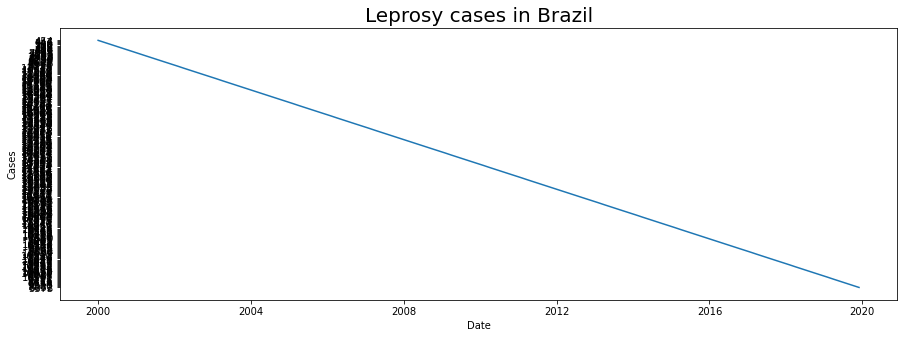

In [39]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x= 'Date', y='Cases', data=lep_ts)
plt.title('Leprosy cases in Brazil', fontsize=20);